In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Preparação do dataframe

In [7]:
### Carga dos dados
df_pontuacao = pd.read_csv('./resources/pontuacao_teste.csv')

In [8]:
# Visualização dos dados
df_pontuacao.head(5)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


In [9]:
# Informações sobre o DataFrame
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


## EDA

In [10]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

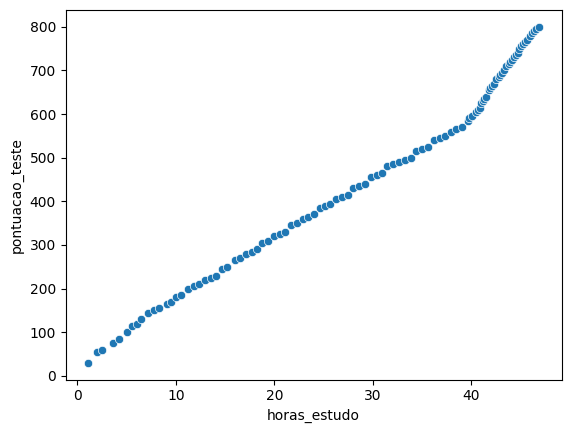

In [13]:
# Grafico de dispersão entre as variáveis
# x = horas_estudo, y = pontuacao
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

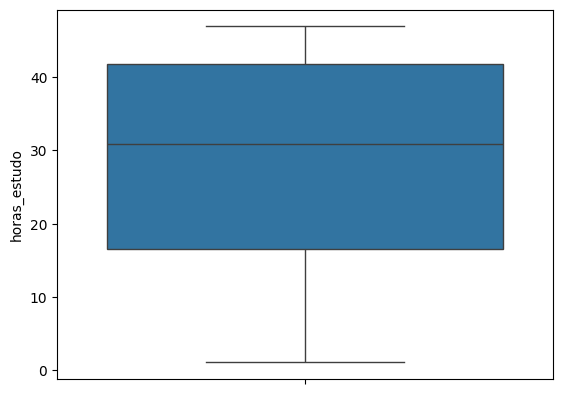

In [14]:
# Verificar se temos outliers na variável horas_estudo
# Utilizando o boxplot para visualizar os outliers
sns.boxplot(data=df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

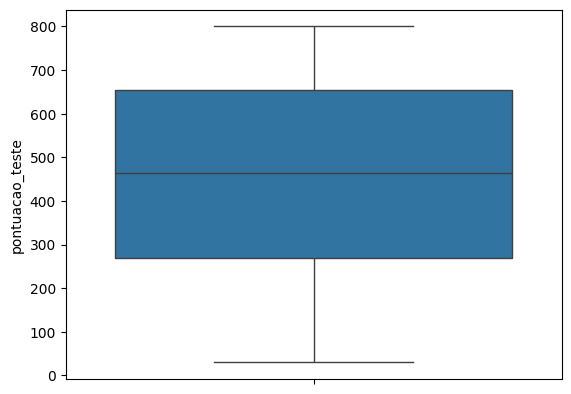

In [15]:
# Verificar se temos outliers na variável dependente (pontuacao_teste)
# Utilizando o boxplot para visualizar os outliers
sns.boxplot(data=df_pontuacao, y='pontuacao_teste')

<Axes: >

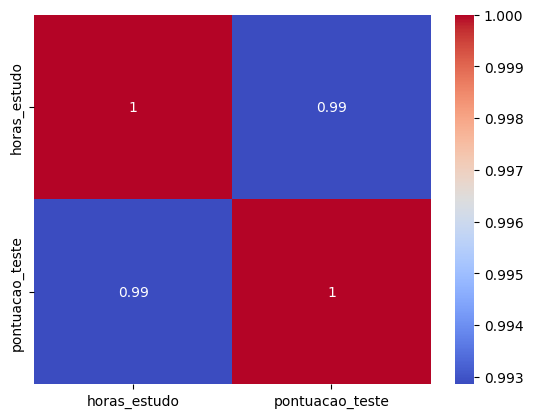

In [19]:
# Avaliar a correlação entre as variáveis
# Utilizando o coeficiente de correlação de Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True, cmap='coolwarm')

<Axes: >

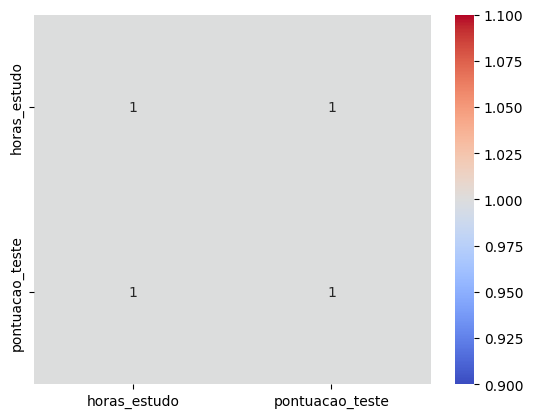

In [20]:
# Avaliar a correlação entre as variáveis
# Utilizando o coeficiente de correlação de Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True, cmap='coolwarm')

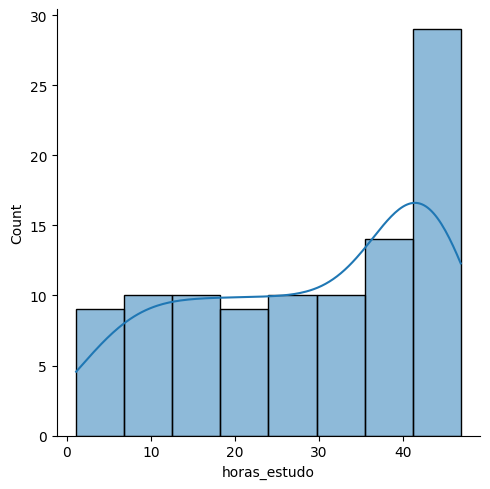

In [21]:
# Histograma das variáveis
# x = horas_estudo
sns.displot(data=df_pontuacao, x='horas_estudo', kde=True)

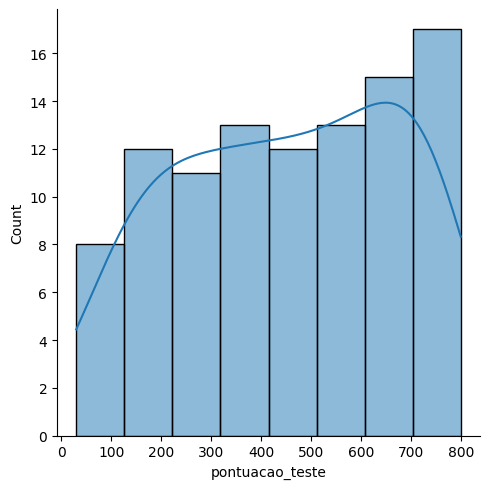

In [22]:
# Histograma das variáveis
# x = pontuacao_teste
sns.displot(data=df_pontuacao, x='pontuacao_teste', kde=True)

## Treinar modelo

In [24]:
# Divisão dos dados em treino e teste
# Quando temos apenas uma variável independente, precisamos ajustar o shape
# X = horas_estudo, variável independente
# y = pontuacao_teste, variável dependente
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=50)

In [25]:
len(X_train), len(X_test), len(y_train), len(y_test)

(70, 31, 70, 31)

In [26]:
# Instanciar e treinar o modelo de regressão linear a ser utilizado
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Coeficientes e interceptação do modelo
reg_model.coef_, reg_model.intercept_

(array([[15.64261854]]), array([8.47660078]))

In [31]:
# Equação da reta
# y = a * x + b
a = reg_model.coef_[0][0]
b = reg_model.intercept_[0]
equacao_reta = f'y = {a:.4f}x + {b:.4f}'
print("A equação da reta é:", equacao_reta)

A equação da reta é: y = 15.6426x + 8.4766


## Validação do modelo - Métricas

In [35]:
# Previsões do modelo com base nos dados de teste
y_pred = reg_model.predict(X_test)

In [40]:
# Calcular métrica de R-squared (R^2) ou coeficiente de determinação
# R2 representa a proporção da variância da variável dependente que é previsível a partir da variável independente
# Quanto mais próximo de 1, melhor o modelo
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r_squared = r2_score(y_test, y_pred)
print("O valor de R-squared é:", r_squared)

O valor de R-squared é: 0.9828400452912442


In [43]:
# Calcular métrica de Mean Absolute Error (MAE) ou Erro Absoluto Médio
# MAE é a média das diferenças absolutas entre as previsões e os valores reais
# MAE = Media (y_test - y_pred)
# A resposta é dada em unidades da variável dependente (pontuacao_teste)
# Quanto menor, melhor o modelo
# MAE é menos sensível a outliers do que o MSE
mae = mean_absolute_error(y_test, y_pred)
print("O valor do MAE é:", mae)

O valor de MAE é: 22.957470277134608


In [44]:
# Calcular métrica de Mean Squared Error (MSE) ou Erro Quadrático Médio
# MSE é a média dos erros ao quadrado, ou seja, a média das diferenças quadráticas entre as previsões e os valores reais
# MSE = Media (y_test - y_pred)^2
# A resposta é dada em unidades ao quadrado da variável dependente (pontuacao_teste)
# Quanto menor, melhor o modelo
# MSE é mais sensível a outliers do que o MAE e penaliza mais os erros maiores
# É interessante utilizar o MSE quando temos um problema de otimização, por exemplo, quando queremos minimizar o erro quadrático
mse = mean_squared_error(y_test, y_pred)
print("O valor do MSE é:", mse)

O valor do MSE é: 766.9972992416427


In [46]:
# Calcular métrica de Root Mean Squared Error (RMSE) ou Raiz do Erro Quadrático Médio
# RMSE é a raiz quadrada do MSE, ou seja, a raiz quadrada da média das diferenças quadráticas entre as previsões e os valores reais
# RMSE = sqrt(MSE)
# A resposta é dada em unidades da variável dependente (pontuacao_teste)
# Quanto menor, melhor o modelo
# RMSE é mais sensível a outliers do que o MAE e penaliza mais os erros maiores
# É interessante utilizar o RMSE quando queremos interpretar o erro em termos da variável dependente
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
print("O valor do RMSE é:", rmse)

O valor do RMSE é: 27.69471608884342


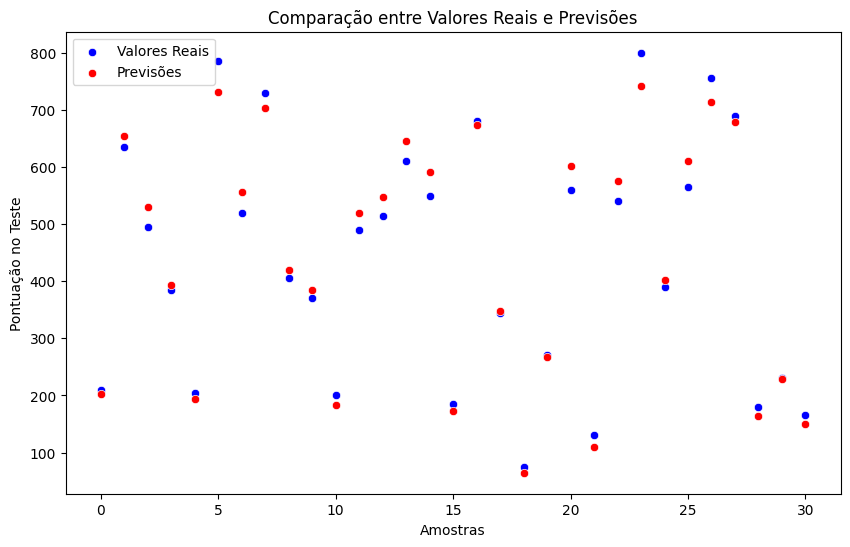

In [52]:
# Análise gráfica dos dados de teste e previsões
# x = horas_estudo
# y = pontuacao_teste
# y_pred = previsões do modelo
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.flatten(), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.flatten(), color='red', label='Previsões')
plt.xlabel('Amostras')
plt.ylabel('Pontuação no Teste')
plt.title('Comparação entre Valores Reais e Previsões')
plt.legend()
plt.show()
